In [1]:
import sys 
sys.path.append('/Users/patroklos/Desktop/delphi_')

import torch as ch
from torch import Tensor
from torch.distributions.multivariate_normal import MultivariateNormal
import matplotlib.pyplot as plt
import IPython 

from delphi.distributions.multivariate_normal import CensoredMultivariateNormal
from delphi import oracle
from delphi.utils import constants as consts
from delphi.utils.helpers import setup_store_with_metadata
from cox.utils import Parameters

In [2]:
args = Parameters({ 
    'samples': 10000, 
    'batch_size': 10, 
    'steps': 5000, 
    'tol': 1e-1, 
    'lr': 1e-1
})

Synthetic Data Experiment for 2 Dimensional Censored Gaussian Distributions 

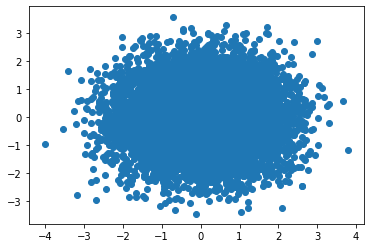

In [3]:
M = MultivariateNormal(ch.zeros(2), ch.eye(2))
samples = M.sample([args.samples])

plt.scatter(samples[:,0], samples[:,1])
plt.show()

Truncate the Dataset

alpha: 0.2494


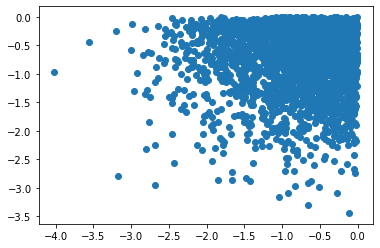

In [10]:
phi = oracle.Right(Tensor([0.0]))
indices = phi(samples).prod(-1).nonzero(as_tuple=False).flatten()
S = samples[indices]
alpha = S.size(0) / samples.size(0)
print("alpha: {}".format(alpha))

plt.scatter(S[:,0], S[:,1])
plt.show()

Run algorithm to Remove Bias from the Dataset

In [11]:
censored = CensoredMultivariateNormal(phi=phi, alpha=alpha, steps=args.steps)
censored.fit(S)

100 Steps | Gradient Estimate: 0.1758553832769394
200 Steps | Gradient Estimate: 0.8711453676223755
300 Steps | Gradient Estimate: 0.19864009320735931
400 Steps | Gradient Estimate: 0.5340241193771362
500 Steps | Gradient Estimate: 0.827353298664093
600 Steps | Gradient Estimate: 0.9061576128005981
700 Steps | Gradient Estimate: 0.2807884216308594
800 Steps | Gradient Estimate: 1.1095794439315796
900 Steps | Gradient Estimate: 0.35627612471580505
1000 Steps | Gradient Estimate: 0.6330857276916504
1100 Steps | Gradient Estimate: 0.20001597702503204
1200 Steps | Gradient Estimate: 0.5417695641517639
1300 Steps | Gradient Estimate: 0.40148603916168213
1400 Steps | Gradient Estimate: 1.0648669004440308
1500 Steps | Gradient Estimate: 0.6983534097671509
1600 Steps | Gradient Estimate: 0.5381404161453247
1700 Steps | Gradient Estimate: 0.3224565088748932
1800 Steps | Gradient Estimate: 0.6294659972190857
1900 Steps | Gradient Estimate: 0.4438534379005432
2000 Steps | Gradient Estimate: 0.596

In [ ]:
S

In [ ]:
00